best cost : 1


best prices : [45, 15, 15, 15, 15, 45, 15, 15, 15, 45, 15, 15, 45, 15, 45, 15, 15, 45, 15, 15, 15, 45, 46, 45]


number of calculation :  13495


runtime :  11.834168434143066




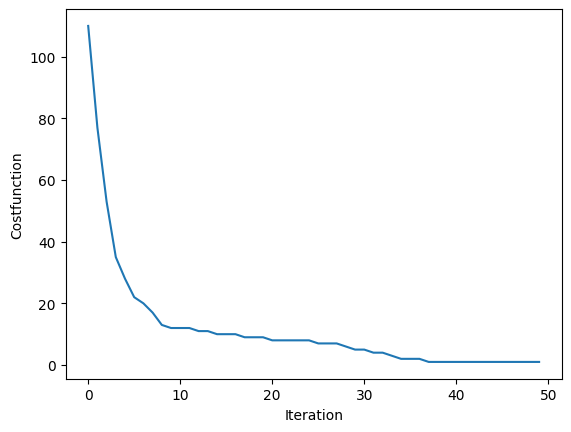

In [1]:
############################################################################ 0 Libraries
from time import time
from math import ceil
from math import exp
from random import randint
from random import uniform
from random import sample
import matplotlib.pyplot as plt

start=time()


############################################################################ 1 Cost Function
def g(x):
    if x>=0 and x<6:
        return (x-3)**2+1
    if x>=6 and x<12:
        return (x-9)**2+10
    if x>=12 and x<18:
        return (x-15)**2
    if x>=18 and x<24:
        return (x-21)**2+5
    if x>=24 and x<30:
        return (x-27)**2+15
    if x>=30 and x<36:
        return (x-33)**2+6
    if x>=36 and x<42:
        return (x-39)**2+11
    if x>=42 and x<=48:
        return (x-45)**2
    
def costfunction(X):
    h=[]
    for i in X:
        h.append(g(i))
    z=sum(h)
    return z



############################################################################ 2 Parameters
nvar=24
lowercost=0
uppercost=48
inputs=[]
outputs=[]
r=0

MaxIt=50
npop=500
beta=20
pc=0.8
nc=2*ceil(pc*npop/2)











############################################################################ 3 Initialization
pop=[]
for i in range (0,npop):
    pop.append([])
for i in range (0,len(pop)):
    for j in range (0,nvar):
        pop[i].append(randint(lowercost,uppercost))
cost=[]
for i in range (0,npop):
    cost.append(costfunction(pop[i]))

costsort, popsort = zip(*sorted(zip(cost, pop)))
costsort=list(costsort)
popsort=list(popsort)


for i in range (0,npop):
    inputs.append(popsort[i])
    outputs.append(costsort[i])

r=r+npop

############################################################################ 4 Functions

def uniformcrossover(p1,p2):
    ch1=[]
    ch2=[]
    alpha=[]
    for i in range (0,nvar):
        alpha.append(randint(0,1))

    for i in range (0,nvar):
        if alpha[i]==0 :
            ch1.append(p1[i])
            ch2.append(p2[i])
        if alpha[i]==1 :
            ch1.append(p2[i])
            ch2.append(p1[i])
    return [ch1 , ch2]


def mutation(p):
    if iteration>=0 and iteration<int(MaxIt/10):
        piim=0.1
        nnm=ceil(piim*nvar)
    if iteration>=int(MaxIt/10) and iteration<3*int(MaxIt/10):
        piim=0.05
        nnm=ceil(piim*nvar)
    if iteration>=3*int(MaxIt/10) and iteration<=MaxIt:
        piim=0.001
        nnm=ceil(piim*nvar)
      
    j=sample(range(0, nvar), nnm)
    ch=p.copy()
    for i in j:
        ch[i]=randint(lowercost,uppercost)
    return ch


def rewrite(picu , num):
    piii=[]
    for i in range(0,len(picu)-1):
        piii.append(picu[i+1]-picu[i])
    del piii[num]
    su=sum(piii)
    for i in range(0,len(piii)):
        piii[i]=piii[i]/su
    picun=[0]
    for i in range (0,len(piii)):
        picun.append(picun[i]+piii[i])
    return picun


def poppaC(costsort,n):  # pop_parents
    poppa=[]
    expo=[]
    for i in range (0,len(costsort)):
        expo.append(exp(-1*beta*costsort[i]/(costsort[-1]+0.001)))
    pi=[]
    s=sum(expo)
    for i in range (0,len(expo)):
        pi.append(expo[i]/s)

    picumulative0=[0]
    for i in range (0,len(pi)):
        picumulative0.append(picumulative0[i]+pi[i])


    for j in range (0,int(n/2)):
      x=popsort.copy()
      picumulative=picumulative0.copy()
      r=uniform(0,1)
      for i in range(0,len(picumulative)-1):
          if r>=picumulative[i] and r<picumulative[i+1]:
              poppa.append(x[i])
              del x[i]
              picumulative=rewrite(picumulative,i)
              break
      r=uniform(0,1)
      for i in range(0,len(picumulative)-1):
          if r>=picumulative[i] and r<picumulative[i+1]:
              poppa.append(x[i])
              break
    return poppa




def poppaM(costsort,n):  # pop_parents
    poppa=[]
    expo=[]
    for i in range (0,len(costsort)):
        expo.append(exp(-1*beta*costsort[i]/(costsort[-1]+0.001)))
    pi=[]
    s=sum(expo)
    for i in range (0,len(expo)):
        pi.append(expo[i]/s)
    picumulative=[0]
    for i in range (0,len(pi)):
        picumulative.append(picumulative[i]+pi[i])

    x=popsort.copy()
    for j in range (0,n):
        r=uniform(0,1)
        for i in range(0,len(picumulative)-1):
            if r>=picumulative[i] and r<picumulative[i+1]:
                poppa.append(x[i])
                break
    return poppa


############################################################################ 5 Main Loop
iterations=[]
costs=[]
for iteration in range(0,MaxIt):
    if iteration>=0 and iteration<int(MaxIt/10):
        pm=0.3
        nm=ceil(pm*npop)
    if iteration>=int(MaxIt/10) and iteration<3*int(MaxIt/10):
        pm=0.2
        nm=ceil(pm*npop)
    if iteration>=3*int(MaxIt/10) and iteration<=MaxIt:
        pm=0.1
        nm=ceil(pm*npop)
     
    popc=poppaC(costsort,nc)
    popcrossover=[]
    costcrossover=[]
    for i in range (0,int(len(popc)/2)):
        p1=popc[2*i]
        p2=popc[2*i+1]
        UC=uniformcrossover(p1,p2)
        c1=UC[0]
        c2=UC[1]
        popcrossover.append(c1)
        popcrossover.append(c2)

        if c1 in inputs:
            a1=outputs[inputs.index(c1)]
            costcrossover.append(a1)
        else:
            inputs.append(c1)
            a1=costfunction(c1)
            r=r+1
            costcrossover.append(a1)
            outputs.append(a1)

        if c2 in inputs:
            a2=outputs[inputs.index(c2)]
            costcrossover.append(a2)
        else:
            inputs.append(c2)
            a2=costfunction(c2)
            r=r+1
            costcrossover.append(a2)
            outputs.append(a2)



    popm=poppaM(costsort,nm)
    popmutation=[]
    costmutation=[]
    for i in range (0,len(popm)):
        p=popm[i]
        
        ccc=mutation(p)
        popmutation.append(ccc)

        if ccc in inputs:
            b=outputs[inputs.index(ccc)]
            costmutation.append(b)
        else:
            inputs.append(ccc)
            b=costfunction(ccc)
            r=r+1
            outputs.append(b)
            costmutation.append(b)       


    mergepop=popsort+popcrossover+popmutation
    mergecost=costsort+costcrossover+costmutation
    mergecostsort, mergepopsort = zip(*sorted(zip(mergecost, mergepop)))
    mergecostsort=list(mergecostsort)
    mergepopsort=list(mergepopsort)
    
    popsort=[]
    for i in mergepopsort:
        if i not in popsort:
            popsort.append(i)
        if len(popsort)==npop:
            break
        
    costsort=[]
    for i in popsort:
        costsort.append(mergecostsort[mergepopsort.index(i)])
    

    iterations.append(iteration)
    costs.append(costsort[0])

    
############################################################################ 6 Results

print('best cost :' , costsort[0])
print('\n')
print('best prices :' , popsort[0])
print('\n')

plt.plot(iterations, costs)
plt.xlabel("Iteration")
plt.ylabel("Costfunction")

print('number of calculation : ' , r)
print('\n')

stop=time()
print('runtime : ' , stop-start)
print('\n')
